## Importy

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data - priprava:
- age: hodnoty voci veku 50 rokov
- cholesterol: hodnoty oproti 5 mmol/liter (ideal pre dospelaka)
- sex: 0 muzi, 1 zeny
- death: True/False

In [202]:
labels = ['age', 'cholesterol', 'sex', 'death']
infarkty = pd.read_csv('infarkty.txt', sep="\t\t", names=labels).drop(0)
infarkty.index -=1
infarkty.head(10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,age,cholesterol,sex,death
0,-2,2.8,0,0.0
1,1,0.2,0,0.0
2,7,-0.1,1,0.0
3,18,-1.1,1,0.0
4,-4,-1.7,1,0.0
5,17,1.3,1,0.0
6,19,0.9,1,0.0
7,10,2.9,1,0.0
8,9,1.0,1,0.0
9,-9,-1.7,1,0.0


In [207]:
infarkty.describe()

,age,cholesterol,sex,death
count,450.000000,450.000000,450.000000,450.000000
mean,4.937778,0.525111,0.593333,0.117778
std,8.714253,1.457326,0.491758,0.322704
min,-10.000000,-2.000000,0.000000,0.000000
25%,-2.000000,-0.700000,0.000000,0.000000
50%,4.000000,0.500000,1.000000,0.000000
75%,12.000000,1.700000,1.000000,0.000000
max,20.000000,3.000000,1.000000,1.000000


In [206]:
infarkty.dtypes

age              int64
cholesterol    float64
sex              int64
death            int64
dtype: object

In [205]:
# Uloha 1: prepis datove typy columnov na numericke
# specialne 'death' column by mal byt `int`
# Hint: existuje columnova funkcia `pd.to_numeric()`

for label in labels:
    infarkty[label] = pd.to_numeric(infarkty[label])

infarkty['death'] = infarkty['death'].map({0.0: 0, 1.0: 1})
infarkty.head()

,age,cholesterol,sex,death
0,-2,2.8,0,0
1,1,0.2,0,0
2,7,-0.1,1,0
3,18,-1.1,1,0
4,-4,-1.7,1,0


# Analyza, vizualizacia

In [208]:
rows = len(infarkty)
dead = len(infarkty[infarkty['death'] == 1])
youngest = min(infarkty['age'][infarkty['death'] == 1])


print("Number of rows: {}".format(rows))
print("Dead people: {}".format(dead))
print("Youngest dead: {}".format(youngest))

Number of rows: 450
Dead people: 53
Youngest dead: -10


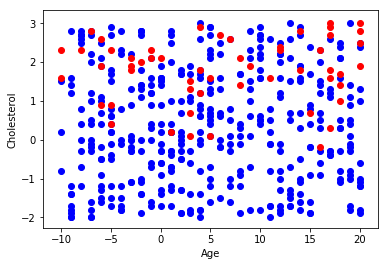

In [222]:
def plot_age_chol(infarkty):
    live = infarkty[infarkty['death'] == 0]
    dead =infarkty[infarkty['death'] == 1]

    plt.scatter(live['age'], live['cholesterol'], c='blue')
    plt.scatter(dead['age'], dead['cholesterol'], c='red')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.show()
    
plot_age_chol(infarkty)

# Logisticka regresia


In [286]:
from sklearn.linear_model import LogisticRegression

X = infarkty[['age', 'cholesterol', 'sex']]
y = infarkty['death']

model = LogisticRegression()
model.fit(X, y)

coeffs = np.array(model.intercept_[0])
coeffs = np.append(coeffs, model.coef_[0])

print("Vyznam parametrov: ")
print(['intercept', 'age', 'cholesterol', 'sex'])
print(coeffs)
print("...........................................")
print("ODDS ratios:")
print(np.exp(coeffs))

Vyznam parametrov: 
['intercept', 'age', 'cholesterol', 'sex']
[-2.46093128  0.01294838  0.77008186 -0.77163399]
...........................................
ODDS ratios:
[0.08535542 1.01303258 2.15994306 0.46225713]


### Logisticka funkcia

In [311]:
def logit(data, coeffs):
    return 1 / (1 + np.exp(-data.dot(coeffs)))

### Muz, 61 rokov, cholesterol 6.1

In [290]:
muz = np.array([1, 11, 1.1, 0])

prob = logit(muz, coeffs)
print("Pravdepodobnost umrtia: {}%".format(100*prob))

Pravdepodobnost umrtia: 18.672854408705426%


### Ak by to bola zena?

In [291]:
zena = muz
zena[3] = 1

prob = logit(zena, coeffs)
print("Pravdepodobnost umrtia: {}%".format(100*prob))

Pravdepodobnost umrtia: 9.595125171960198%


### Vyznam interceptu

In [295]:
clovek = np.array([1,0,0,0]) # priemerny clovek

odds = np.exp(coeffs[0])
print(odds)

prob = odds / (1 + odds)
print("{}%".format(100*prob))

0.08535542447124
7.864283215134176%


### Narast sance (ODDS) vs. narast pravdepodobnosti (prob)

In [300]:
# Nizka sanca zomriet - zena 40 rokov, cholesterol 3
zdravy = np.array([1,-10,-2,1])
prob = logit(zdravy, coeffs)
print("Pravdepodobnost umrtia: {}%".format(100*prob))

Pravdepodobnost umrtia: 0.7375323803778361%


In [301]:
# Ten isty clovek s cholesterolom + 1
zdravy2 = np.array([1,-10,-2+1,1])
prob2 = logit(zdravy2, coeffs)
print("Pravdepodobnost umrtia: {}%".format(100*prob2))

Pravdepodobnost umrtia: 1.5795152624119069%


In [302]:
print(prob2/prob)

2.1416215808758454


In [304]:
odds = (prob2 / (1 - prob2)) / (prob / (1 - prob))
print(odds)

2.1599430585204638


In [307]:
# Vysoka sanca zomriet - muz 75 rokov, cholesterol 6.1
chory = np.array([1,25,1.1,0])
prob = logit(chory, coeffs)
print("Pravdepodobnost umrtia: {}%".format(100*prob))

Pravdepodobnost umrtia: 21.5830526044298%


In [308]:
# Ten isty clovek s cholesterolom + 1
chory2 = np.array([1,25,1.1+1,0])
prob2 = logit(chory2, coeffs)
print("Pravdepodobnost umrtia: {}%".format(100*prob2))

Pravdepodobnost umrtia: 37.28405876575465%


In [309]:
print(prob2/prob)

1.7274692069324018


In [310]:
odds = (prob2 / (1 - prob2)) / (prob / (1 - prob))
print(odds)

2.159943058520463


# Ako model otestovat?

In [315]:
from sklearn.model_selection import train_test_split

X = infarkty[['age', 'cholesterol', 'sex']]
y = infarkty['death']

# Rozdelime na trenovacie a testovacie data - nahodne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 360
Test size: 90


In [341]:
model = LogisticRegression()
model.fit(X_train, y_train)

coeffs = np.array(model.intercept_[0])
coeffs = np.append(coeffs, model.coef_[0])

print("Vyznam parametrov: ")
print(['intercept', 'age', 'cholesterol', 'sex'])
print(coeffs)
print("...........................................")
print("ODDS ratios:")
print(np.exp(coeffs))

Vyznam parametrov: 
['intercept', 'age', 'cholesterol', 'sex']
[-2.43369552 -0.00296732  0.81171957 -0.71404435]
...........................................
ODDS ratios:
[0.08771209 0.99703708 2.25177675 0.48965983]


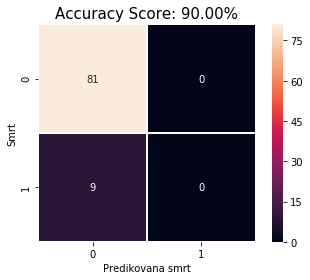

In [342]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

def print_summary(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # presnost
    accuracy = accuracy_score(y_test, y_pred)

    # confusion tabulka
    conf = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf, annot=True, fmt=".0f", linewidths=.5, square = True)
    plt.ylabel('Smrt')
    plt.xlabel('Predikovana smrt')
    plt.title('Accuracy Score: {0:.2f}%'.format(100*accuracy), size = 15)
    
print_summary(model, X_test, y_test)

# Ako model vylepsit?

Vieme urobit nieco preto, aby sme modelovaci algoritmus vylepsili?

## Standardizacia


In [210]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

infarkty_to_scale = infarkty[['age', 'cholesterol']]

scaler.fit(infarkty_to_scale)
print("Means of age, cholesterol: {}".format(scaler.mean_))
print("Standard deviations of age, cholesterol: {}".format(scaler.scale_))

Means of age, cholesterol: [4.93777778 0.52511111]
Standard deviations of age, cholesterol: [8.70456557 1.4557062 ]


In [214]:
infarkty_scaled = pd.DataFrame(scaler.transform(infarkty_to_scale), columns=['age', 'cholesterol'])
infarkty_scaled[['sex', 'death']] = infarkty[['sex', 'death']]
print(infarkty_scaled['age'].mean())
print(infarkty_scaled['age'].std())

-3.157967714489334e-17
1.0011129663989997


In [335]:
infarkty.head()

,age,cholesterol,sex,death
0,-2,2.8,0,0
1,1,0.2,0,0
2,7,-0.1,1,0
3,18,-1.1,1,0
4,-4,-1.7,1,0


In [336]:
infarkty_scaled.head()

,age,cholesterol,sex,death
0,-0.797027,1.562739,0,0
1,-0.452381,-0.223336,0,0
2,0.236913,-0.429421,1,0
3,1.500617,-1.116373,1,0
4,-1.026792,-1.528544,1,0


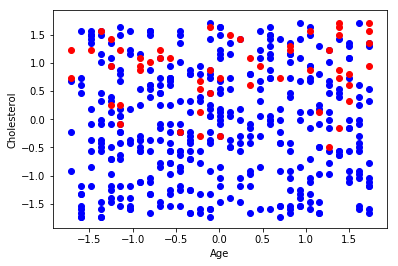

In [337]:
plot_age_chol(infarkty_scaled)

## Regularizacia


In [338]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [381]:
X = infarkty_scaled[['age', 'cholesterol', 'sex']]
y = infarkty_scaled['death']

# Rozdelime na trenovacie a testovacie data - nahodne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 360
Test size: 90


Vyznam parametrov: 
['intercept', 'age', 'cholesterol', 'sex']
[-0.0602563   0.01410633  0.50464459 -0.14390955]
...........................................
ODDS ratios:
[0.94152319 1.0142063  1.65639671 0.86596607]


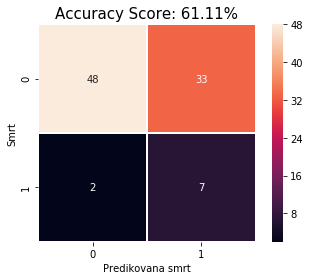

In [418]:
model = LogisticRegression(fit_intercept=True,
                           C=0.01,
                           penalty="l2",
                           class_weight="balanced")

model.fit(X_train, y_train)

coeffs = np.array(model.intercept_[0])
coeffs = np.append(coeffs, model.coef_[0])

print("Vyznam parametrov: ")
print(['intercept', 'age', 'cholesterol', 'sex'])
print(coeffs)
print("...........................................")
print("ODDS ratios:")
print(np.exp(coeffs))

print_summary(model, X_test, y_test)